In [1]:
import pandas as pd
import numpy as np
import datetime
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
df=pd.read_csv('data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='object']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [5]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [6]:
df[categorical_features].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
#describe of numerical variable
df[numerical_features].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
missing_val=[feature for feature in df.columns if df[feature].isnull().sum()>1]
missing_val

for feature in missing_val:
    print(feature,':',np.round(df[feature].isnull().mean(),4) ,'% missing values')

LotFrontage : 0.1774 % missing values
Alley : 0.9377 % missing values
MasVnrType : 0.0055 % missing values
MasVnrArea : 0.0055 % missing values
BsmtQual : 0.0253 % missing values
BsmtCond : 0.0253 % missing values
BsmtExposure : 0.026 % missing values
BsmtFinType1 : 0.0253 % missing values
BsmtFinType2 : 0.026 % missing values
FireplaceQu : 0.4726 % missing values
GarageType : 0.0555 % missing values
GarageYrBlt : 0.0555 % missing values
GarageFinish : 0.0555 % missing values
GarageQual : 0.0555 % missing values
GarageCond : 0.0555 % missing values
PoolQC : 0.9952 % missing values
Fence : 0.8075 % missing values
MiscFeature : 0.963 % missing values


In [ ]:
#how missing value effect the target variable-->house price

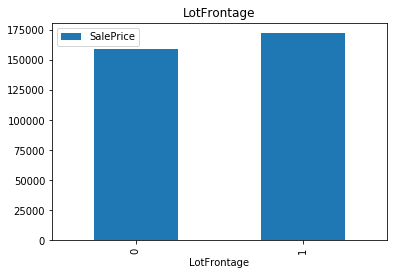

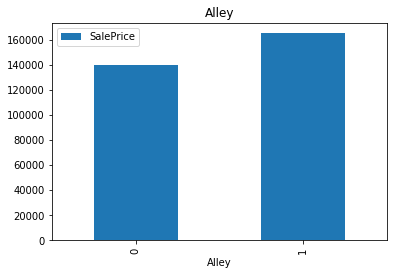

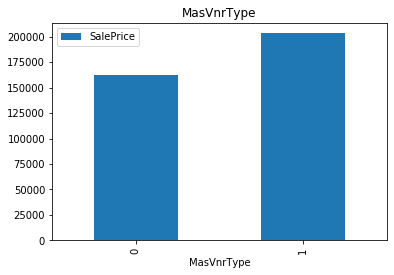

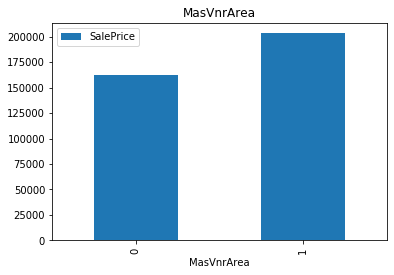

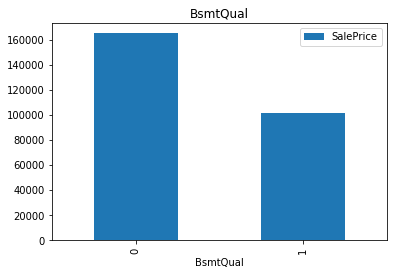

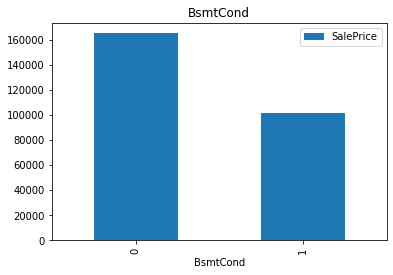

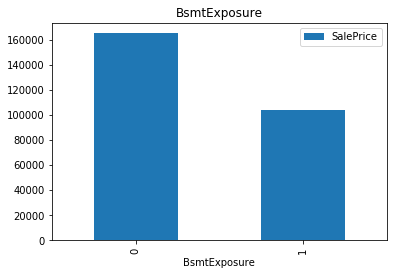

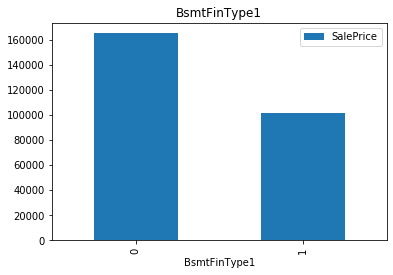

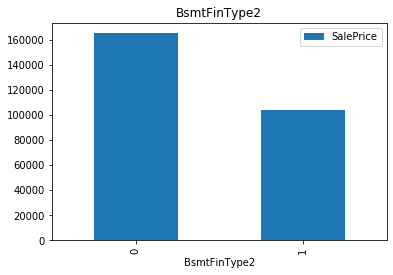

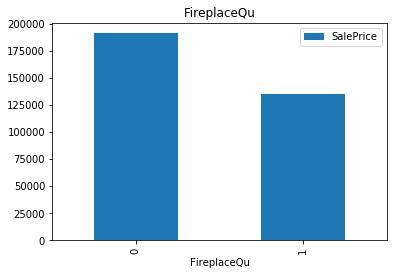

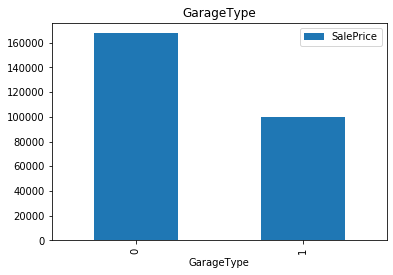

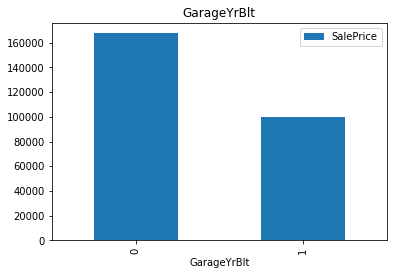

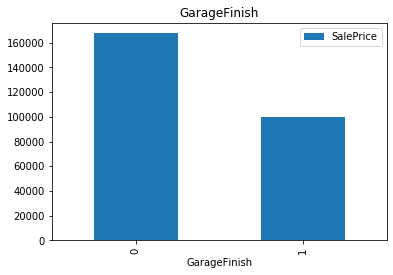

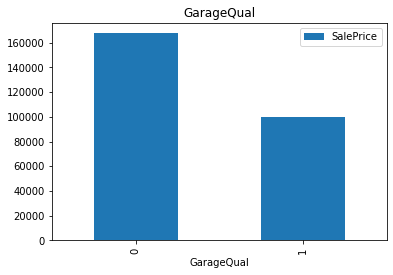

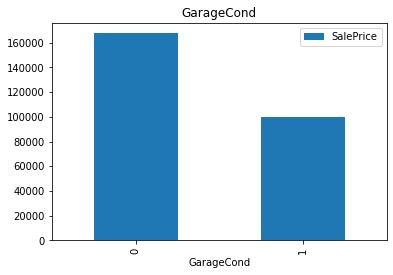

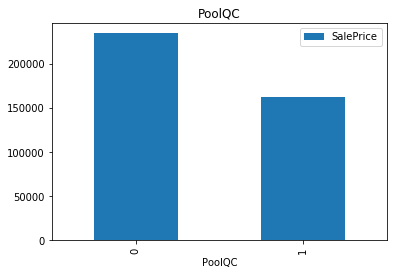

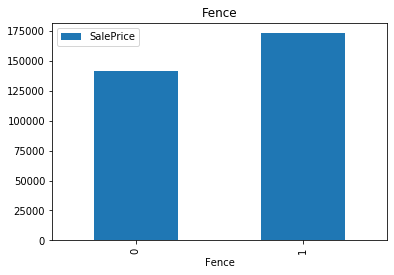

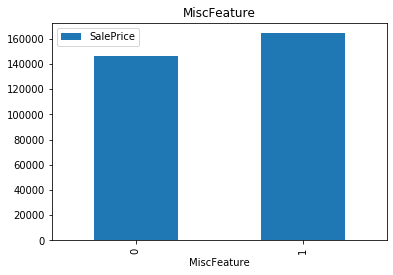

In [10]:
for feature in missing_val:
    data=df.copy()
    
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)[['SalePrice']].median().plot.bar()
    plt.title(feature)
    plt.show()

In [ ]:
df[numerical_features].head()

In [11]:
#year data
years_data=[feature for feature in df.columns if 'Yr' in feature or 'Year' in feature  ]
years_data

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
df[years_data]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


In [ ]:
#how years data related to saleprice

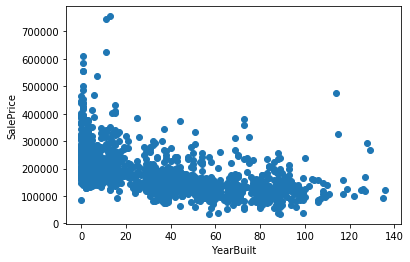

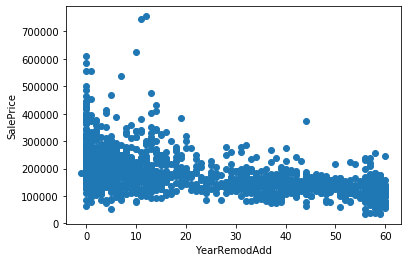

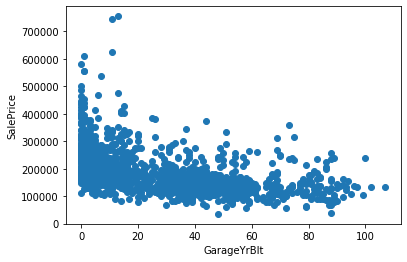

In [13]:
for feature in years_data:
    if feature !='YrSold':
        df[feature]=df['YrSold']-df[feature]
        plt.scatter(df[feature],df.SalePrice)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


In [14]:
for feature in numerical_features:
     print(feature,df[feature].unique())

Id [   1    2    3 ... 1458 1459 1460]
MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
YearBuilt [  5  31   7  91   8  16   3  36  77  69  43   1  46  48  78  40  39   4
  51   6  42   2  59  49  81  88  15  55  57  53  41  24  33  47  89  10
  72  25  52  44   0  87  12  

In [15]:
discrete_features=[feature for feature in df.columns if (len(df[feature].unique())<25) and (df[feature].dtype!='object')]

In [16]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


In [17]:
continuous_features=[feature for feature in df.columns if feature not in discrete_features and feature not in years_data and (df[feature].dtype!='object')]

In [18]:
df[continuous_features]

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,0,175000
1456,1457,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,0,210000
1457,1458,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,0,266500
1458,1459,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,0,142125


In [ ]:
#check the distribution of continuous features

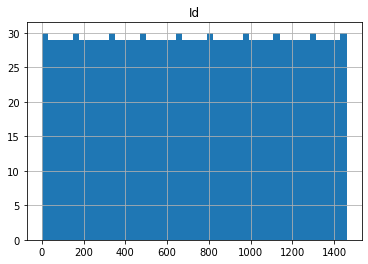

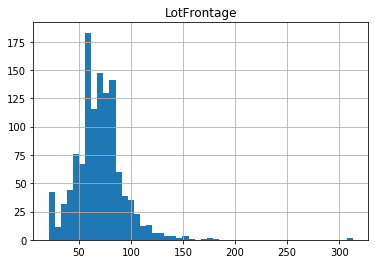

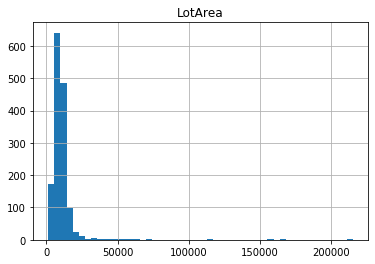

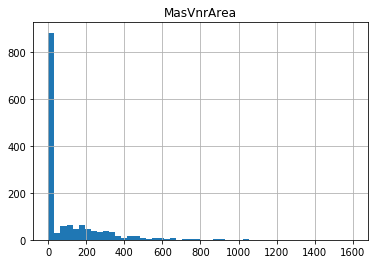

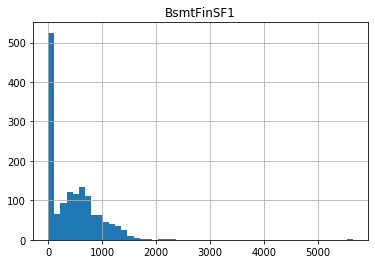

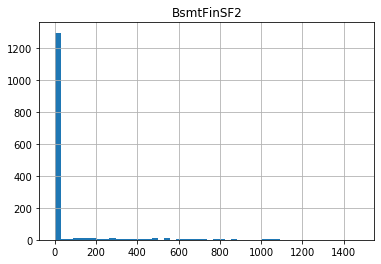

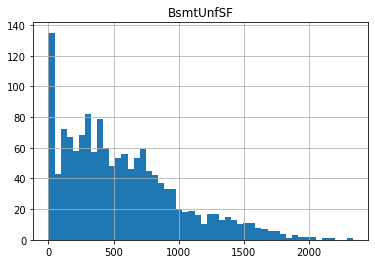

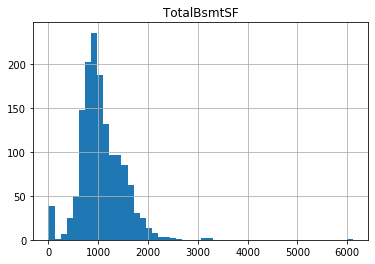

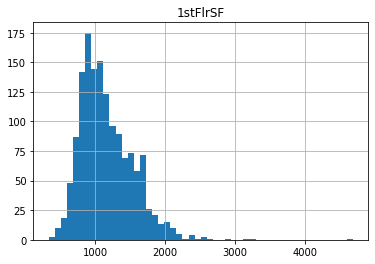

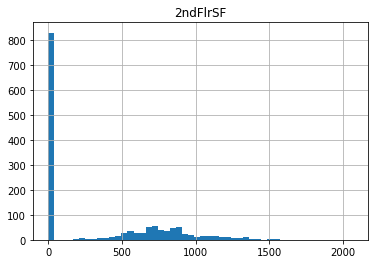

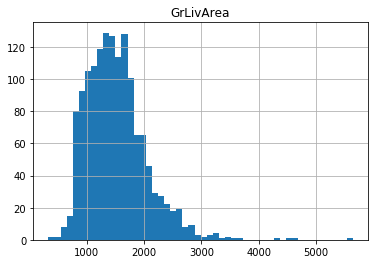

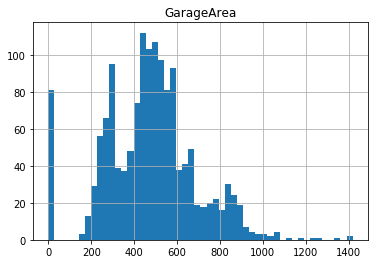

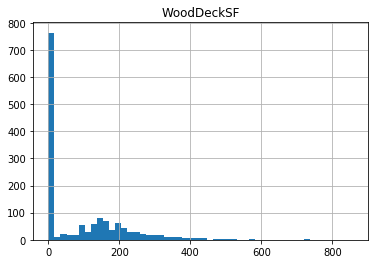

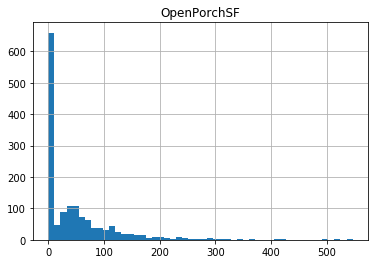

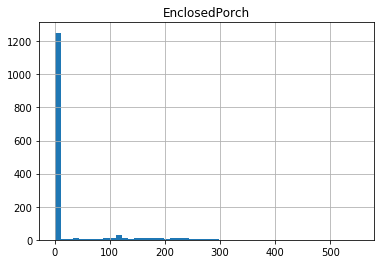

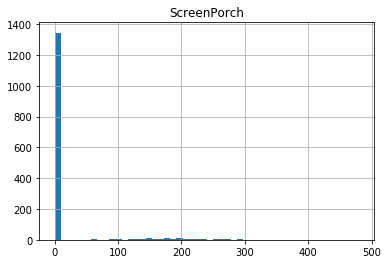

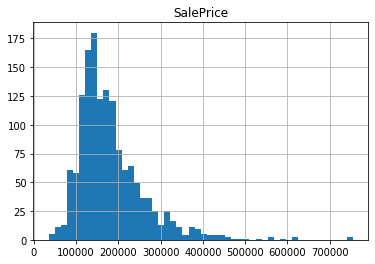

In [19]:
for feature in continuous_features:
    df[feature].hist(bins=50)
    plt.title(feature)
    plt.show()

In [20]:
data=df[numerical_features]
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,5,5,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,31,31,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,7,6,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,91,36,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,8,8,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
#check wheather feature is gaussion or normal distributed

In [21]:
import scipy.stats as stat
import pylab

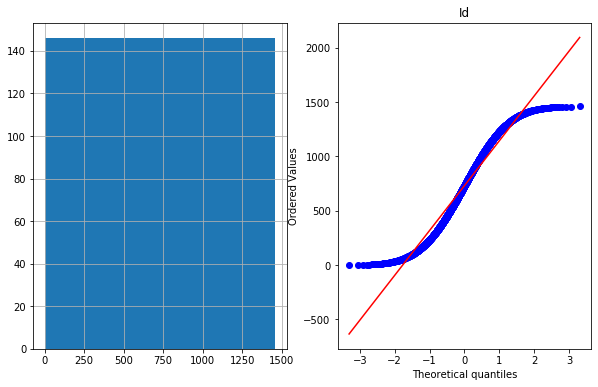

C:\Users\Lenovo T430S\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Lenovo T430S\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Lenovo T430S\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


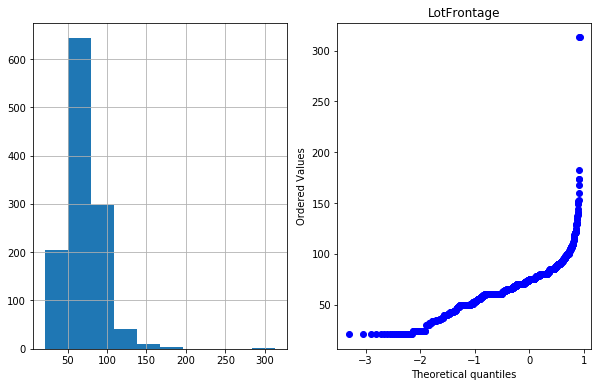

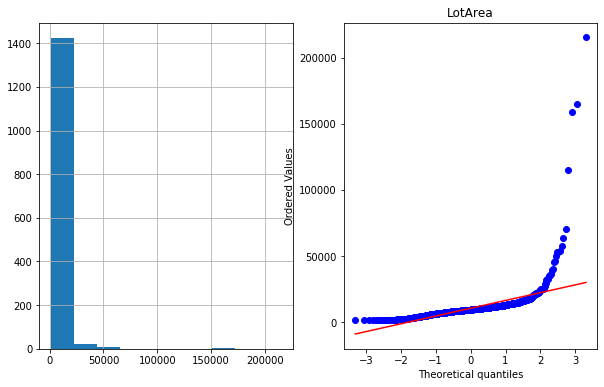

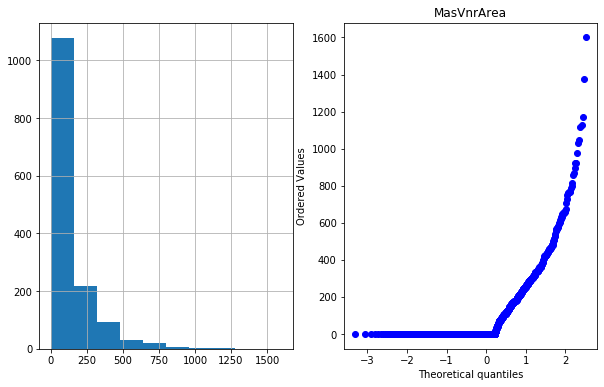

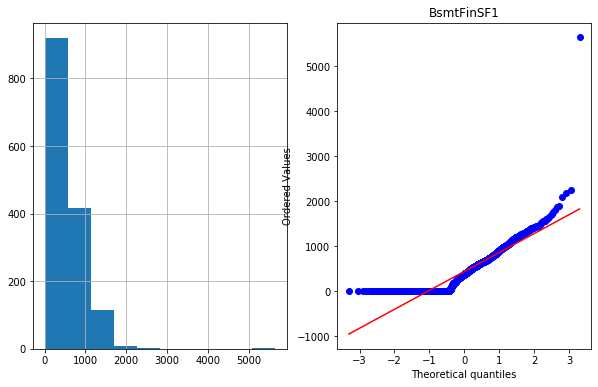

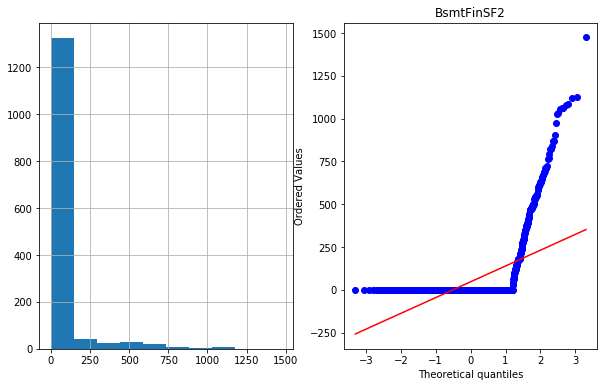

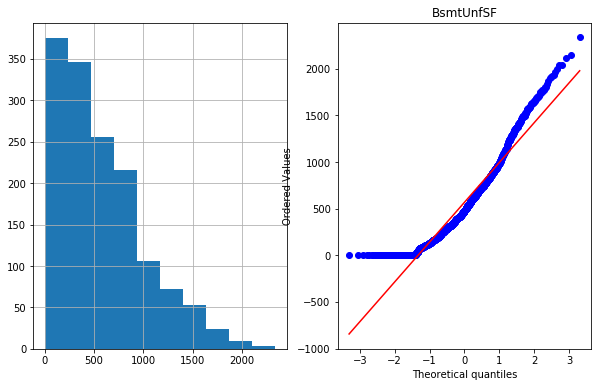

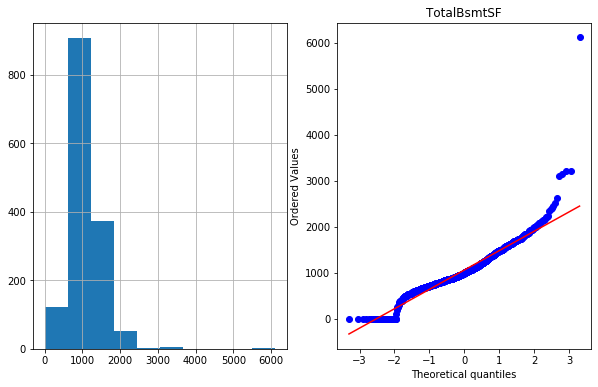

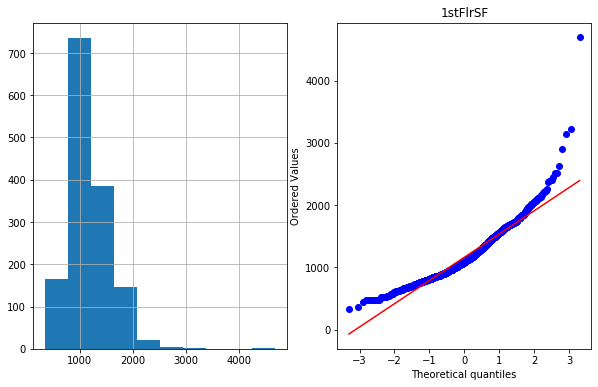

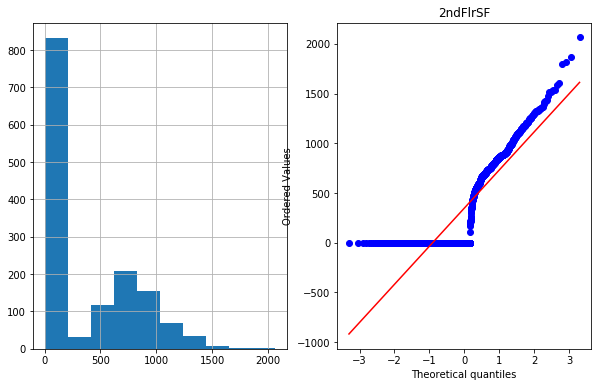

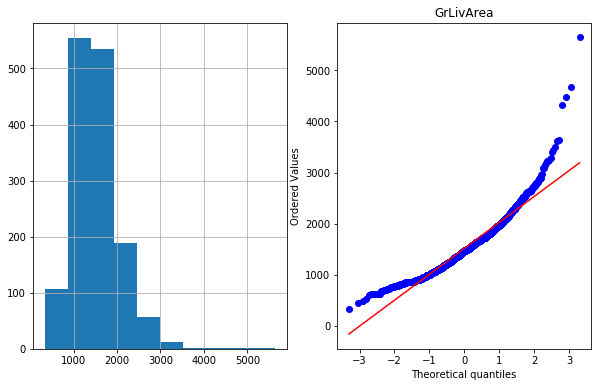

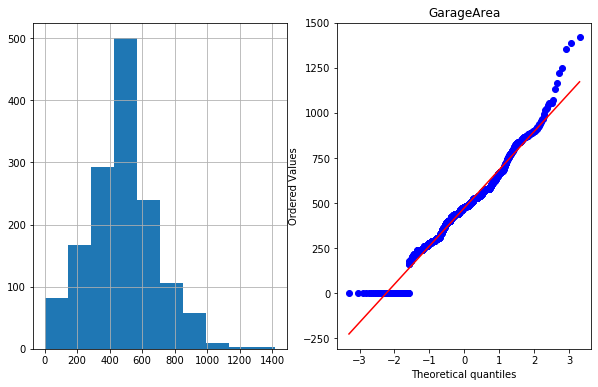

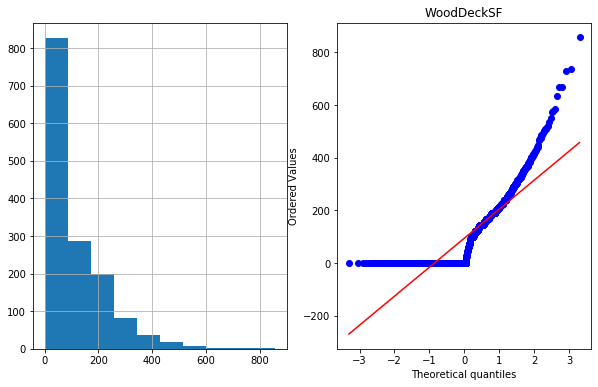

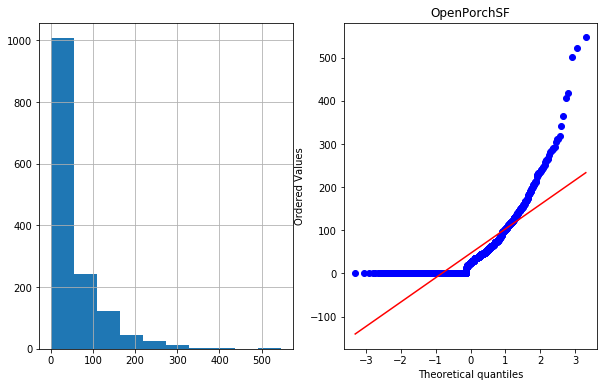

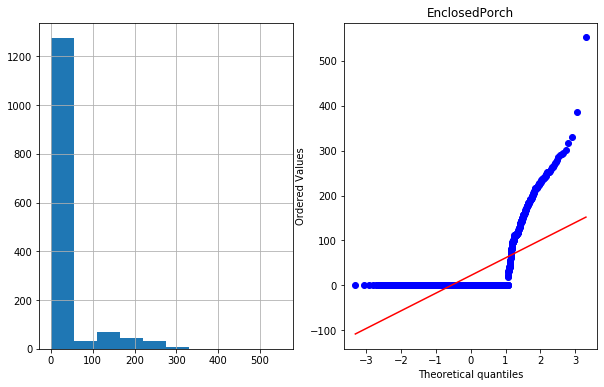

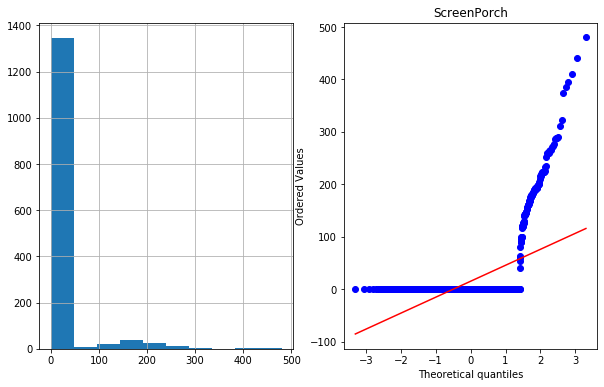

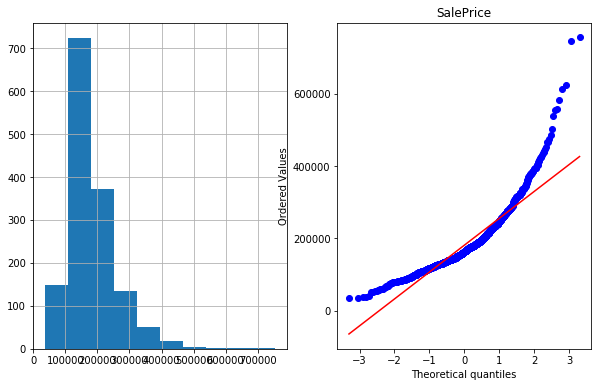

In [22]:
#### if you check wheather feature is gaussion or normal distributed 
#### Q-Q plot
for feature in continuous_features:
    
            plt.figure(figsize=(10,6))
            plt.subplot(1,2,1)
            df[feature].hist()
            plt.subplot(1,2,2)
            stat.probplot(df[feature],dist='norm',plot=pylab)
            plt.title(feature)
            plt.show()


In [ ]:
#how cotinuous features effect to saleprice
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

In [ ]:
#classification of each categorical feature


In [23]:
for feature in categorical_features:
    print(feature,':',len(df[feature].unique()),'subcategories')

MSZoning : 5 subcategories
Street : 2 subcategories
Alley : 3 subcategories
LotShape : 4 subcategories
LandContour : 4 subcategories
Utilities : 2 subcategories
LotConfig : 5 subcategories
LandSlope : 3 subcategories
Neighborhood : 25 subcategories
Condition1 : 9 subcategories
Condition2 : 8 subcategories
BldgType : 5 subcategories
HouseStyle : 8 subcategories
RoofStyle : 6 subcategories
RoofMatl : 8 subcategories
Exterior1st : 15 subcategories
Exterior2nd : 16 subcategories
MasVnrType : 5 subcategories
ExterQual : 4 subcategories
ExterCond : 5 subcategories
Foundation : 6 subcategories
BsmtQual : 5 subcategories
BsmtCond : 5 subcategories
BsmtExposure : 5 subcategories
BsmtFinType1 : 7 subcategories
BsmtFinType2 : 7 subcategories
Heating : 6 subcategories
HeatingQC : 5 subcategories
CentralAir : 2 subcategories
Electrical : 6 subcategories
KitchenQual : 4 subcategories
Functional : 7 subcategories
FireplaceQu : 6 subcategories
GarageType : 7 subcategories
GarageFinish : 4 subcategorie

In [ ]:
#Outliears

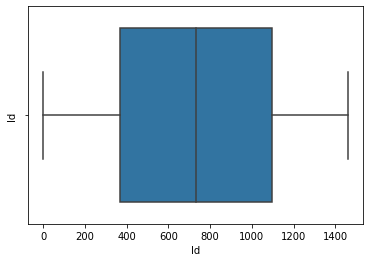

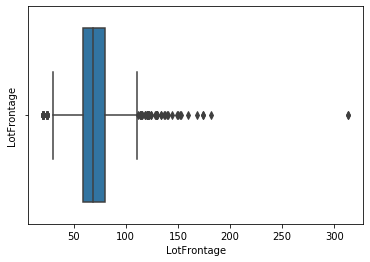

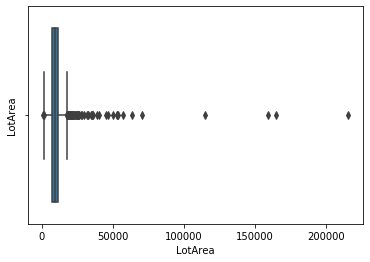

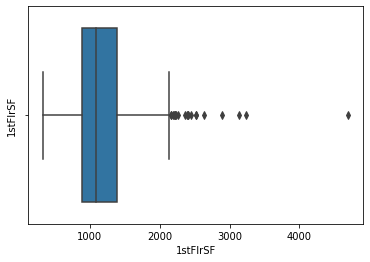

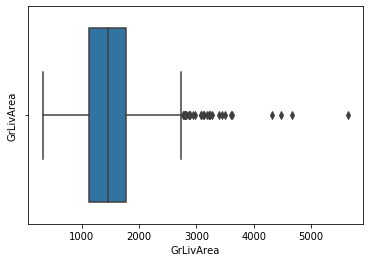

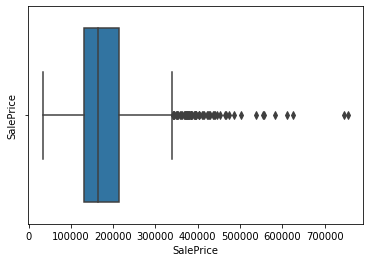

In [24]:
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
       
        sb.boxplot(df[feature])
        plt.ylabel(feature)
        
        plt.show()

In [25]:
df[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# correlation of each variable with salesPrice

In [26]:
corr=data[df.columns[:]].corr()['SalePrice'][:]
corr

Id              -0.017942
MSSubClass      -0.073959
LotFrontage      0.355878
LotArea          0.257320
OverallQual      0.817184
OverallCond     -0.036868
YearBuilt       -0.587290
YearRemodAdd    -0.568136
MasVnrArea       0.430809
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
BsmtFullBath     0.236224
BsmtHalfBath    -0.005149
FullBath         0.594771
HalfBath         0.313982
BedroomAbvGr     0.209044
KitchenAbvGr    -0.147548
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
GarageYrBlt     -0.542110
GarageCars       0.680625
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
MoSold           0.057329
YrSold          -0.037263
SalePrice        1.000000
Name: SalePr

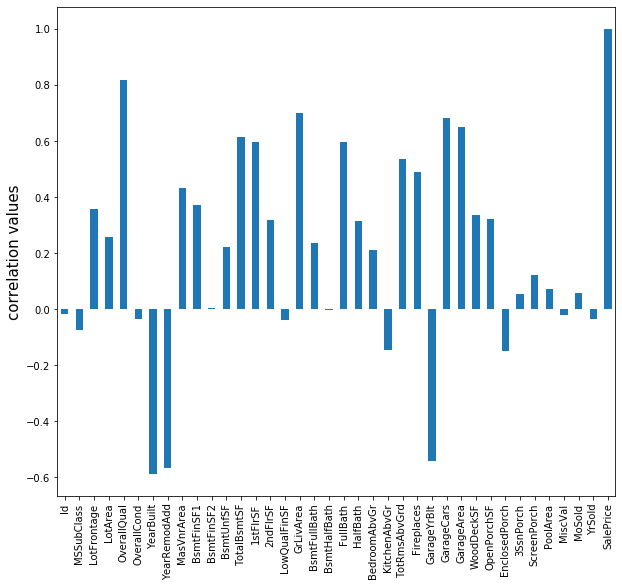

In [27]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,9
plt.ylabel('correlation values',fontsize=15)
corr.plot(kind='bar')

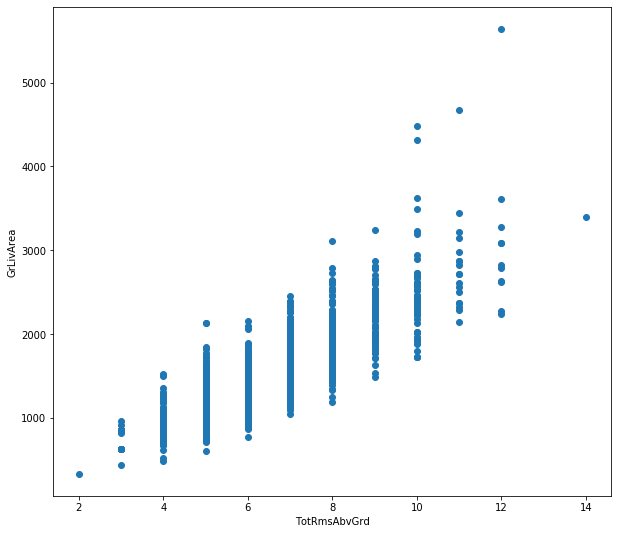

In [28]:
plt.scatter(x=df['TotRmsAbvGrd'], y=df['GrLivArea'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')
plt.show();

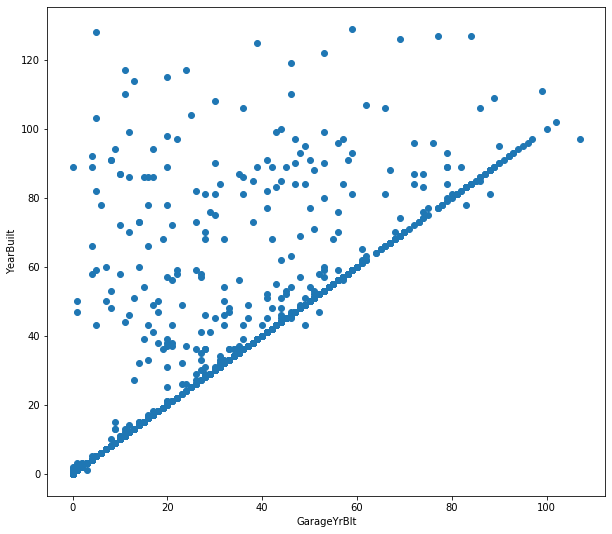

In [29]:
# GarageYrBlt and YearBuilt
plt.scatter(x=df['GarageYrBlt'], y=df['YearBuilt'])
plt.xlabel('GarageYrBlt')
plt.ylabel('YearBuilt')
plt.show();

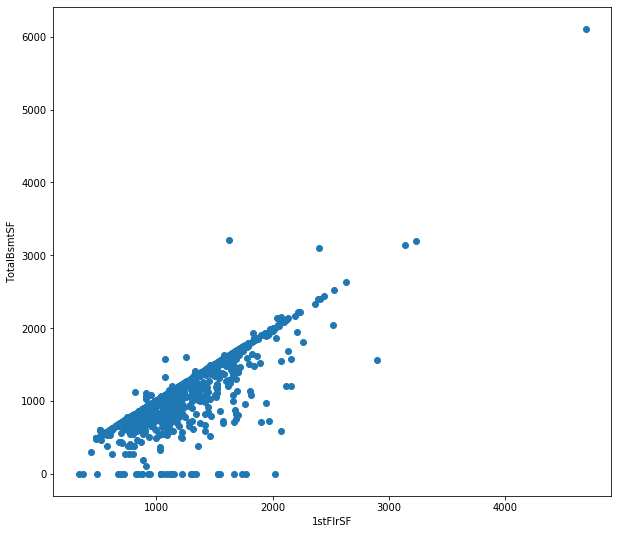

In [30]:
# 1stFlrSF and TotalBsmtSF
plt.scatter(x=df['1stFlrSF'], y=df['TotalBsmtSF'])
plt.xlabel('1stFlrSF')
plt.ylabel('TotalBsmtSF')
plt.show();


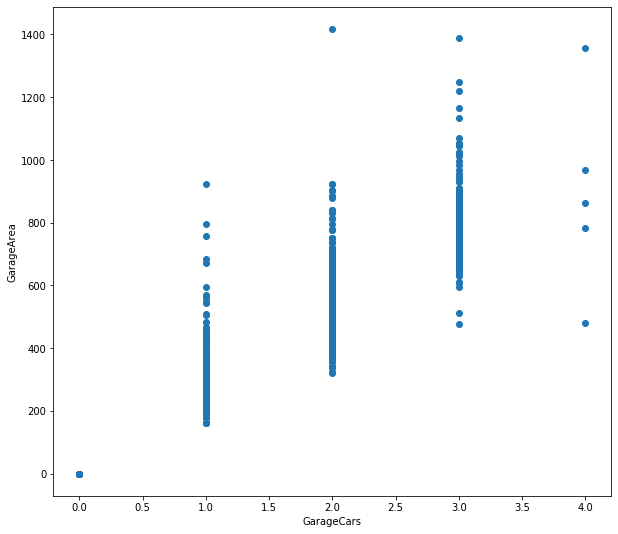

In [31]:
# GarageCars and SalePrice
plt.scatter(x=df['GarageCars'], y=df['GarageArea'])
plt.xlabel('GarageCars')
plt.ylabel('GarageArea')
plt.show();

In [32]:
# correlation
corr = df.corr()
# sort in descending order
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]

corr_top

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
MasVnrArea      0.477493
Name: SalePrice, dtype: float64

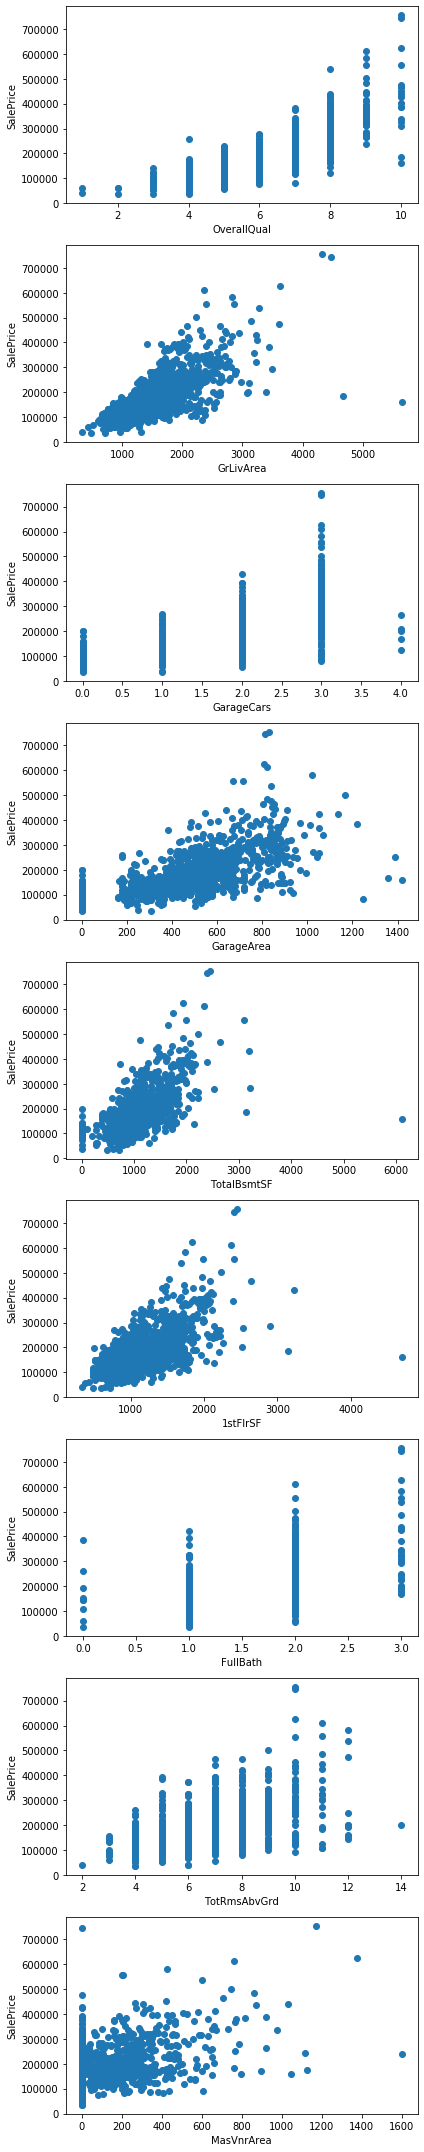

In [33]:
# Top features and SalePrice
numerical_features = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt']
categorical_features = ['OverallQual','GarageCars','FullBath','TotRmsAbvGrd']

fig,ax=plt.subplots(nrows=9,ncols=1,figsize=(6,30))
for i in range(len(top_features)):    

    ax[i].scatter(x=df[top_features[i]], y=df['SalePrice'])
    ax[i].set_xlabel('%s'%(top_features[i]))
    ax[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.savefig('./Top_featuresvsSalePrice.jpg',dpi=300,bbox_inches='tight')
plt.show();

In [34]:
Q1 = []
Q3 = []
Lower_bound = []
Upper_bound = []
Outliers = []


for i in top_features:
    
    # 25th and 75th percentiles
    q1, q3 = np.percentile(df[i],25), np.percentile(df[i],75)
    # Interquartile range
    iqr = q3 - q1
    # Outlier cutoff
    cut_off = 1.5*iqr
    # Lower and Upper bounds
    lower_bound = q1-cut_off
    upper_bound = q3+cut_off
        
    # save outlier indexes
    outlier = [x for x in df.index if df.loc[x,i]<lower_bound or df.loc[x,i]>upper_bound]
    
    # append values for DataFrame
    Q1.append(q1)
    Q3.append(q3)
    Lower_bound.append(lower_bound)
    Upper_bound.append(upper_bound)
    Outliers.append(len(outlier))
    
    try:
        df.drop(outlier,inplace=True,axis=0)
    except:
        continue

df_out = pd.DataFrame({'Column':top_features,'Q1':Q1,'Q3':Q3,'Lower bound':Lower_bound,'Upper_bound':Upper_bound,'No. of outliers':Outliers})    
df_out.sort_values(by='No. of outliers',ascending=False)

C:\Users\Lenovo T430S\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Column,Q1,Q3,Lower bound,Upper_bound,No. of outliers
4,TotalBsmtSF,792.75,1266.25,82.500,1976.500,58
1,GrLivArea,1131.00,1778.25,160.125,2749.125,31
3,GarageArea,325.25,576.00,-50.875,952.125,14
7,TotRmsAbvGrd,5.00,7.00,2.000,10.000,11
5,1stFlrSF,866.00,1343.50,149.750,2059.750,7
2,GarageCars,1.00,2.00,-0.500,3.500,5
0,OverallQual,5.00,7.00,2.000,10.000,2
6,FullBath,1.00,2.00,-0.500,3.500,0
8,MasVnrArea,NaN,NaN,NaN,NaN,0


In [35]:
df.shape

(1332, 81)

In [36]:
df["PoolQC"] = df["PoolQC"].fillna("None")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df['MSZoning'] =df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df = df.drop(['Utilities'], axis=1)
df["Functional"] = df["Functional"].fillna("Typ")
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] =df['SaleType'].fillna(df['SaleType'].mode()[0])
df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [37]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [38]:
#MSSubClass =The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [39]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# Check shape        
print('Shape housing_data: {}'.format(df.shape))

Shape housing_data: (1332, 80)


In [40]:
# Adding Total Square Feet feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [41]:
df= df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [44]:
df.shape

(1332, 77)

In [45]:
#log transform skewed numeric features
from scipy.stats import norm,skew
numerical_features = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats =df[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
MiscVal,30.520573
PoolArea,21.322852
LotArea,11.500678
3SsnPorch,10.485900
LowQualFinSF,10.447145


# Box cox transformation of highly skewed features

In [46]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)
    df[feat] += 1

There are 58 skewed numerical features to Box Cox transform


In [47]:
df.shape

(1332, 77)

# Adding dummy categorical features

In [48]:
df= pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.730463,3.750250,6.831328,20.212182,1.730463,2.540963,1.0,3.440268,2.540963,3.055642,...,0,0,0,1,0,0,0,0,1,0
1,2.194318,2.820334,7.221214,20.712205,1.730463,2.540963,1.0,3.259674,3.259674,5.545286,...,0,0,0,1,0,0,0,0,1,0
2,2.540963,3.750250,6.914940,21.347241,1.730463,1.000000,1.0,3.440268,2.540963,3.440268,...,0,0,0,1,0,0,0,0,1,0
3,2.820334,3.885846,6.684507,20.691553,1.730463,1.000000,1.0,3.440268,2.540963,7.469750,...,0,0,0,1,1,0,0,0,0,0
4,3.055642,3.750250,7.314735,22.325160,1.730463,1.000000,1.0,3.602594,2.540963,3.602594,...,0,0,0,1,0,0,0,0,1,0


In [49]:
print(df.shape)

(1332, 207)


In [50]:
X=df.iloc[:,:-1]
y=df.SalePrice

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X_train,y_train)

rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
print(rmse)

In [52]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# different alpha values
alphas = [0.01, 0.1, 0.3, 1, 3, 5, 10, 15, 20]

for a in alphas:

    lr = Ridge(alpha=a)
    
    lr.fit(X_train,y_train)
    
    rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
    print('For Alpha = ',a,', RMSE = ',rmse)

For Alpha =  0.01 , RMSE =  1.9270785184307448e-05
For Alpha =  0.1 , RMSE =  0.00018936444170659656
For Alpha =  0.3 , RMSE =  0.0005505346087975614
For Alpha =  1 , RMSE =  0.0017063503275440584
For Alpha =  3 , RMSE =  0.004618706573576271
For Alpha =  5 , RMSE =  0.007283570592083452
For Alpha =  10 , RMSE =  0.013431642532666314
For Alpha =  15 , RMSE =  0.019138095841189025
For Alpha =  20 , RMSE =  0.02455158553566106


In [53]:
model = Ridge(alpha=3)
model.fit(X_train,y_train)

Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

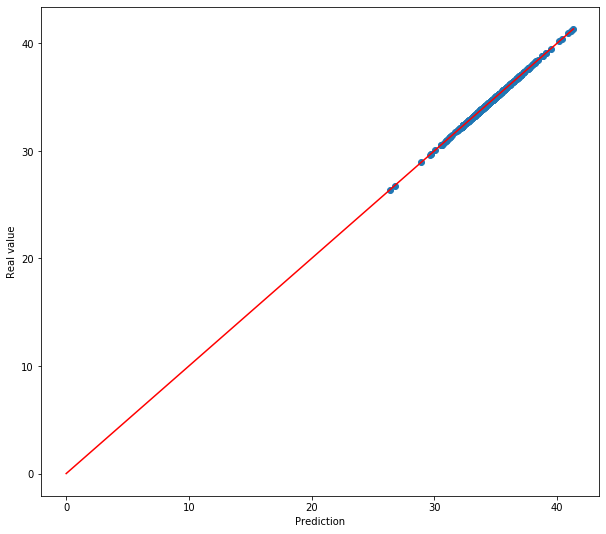

In [54]:
y_pred = model.predict(X_test)

# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [58]:
r2_score(y_test,y_pred)

0.9999952959376116